In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [28]:
complete_dataset = pd.read_csv("./datasets/properati_argentina_2021.csv")
df = complete_dataset.copy()

# Analisis Exploratorio del Dataset

**Primeras 5 observaciones**

In [3]:
df.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


**Ultimas 5 observaciones**

In [4]:
df.tail()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
460149,EWHC/xcODFkeEA0+pPE6Rw==,2021-01-05,2021-01-08,2021-01-05,-34.599594,-58.588715,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,NaN,NaN,NaN,Venta,Local comercial,NaN,NaN,113.0,113.0,190000.0,USD,LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-
460150,txKUq0LjMaORjJQeeqTOfw==,2021-01-05,2021-11-01,2021-01-05,-34.582777,-58.545220,Bs.As. G.B.A. Zona Norte,General San Martín,Villa Lynch,NaN,NaN,Venta,Local comercial,NaN,NaN,11580.0,11580.0,3500000.0,USD,Nave Industrial - Villa Lynch
460151,E0zwHT18DX8AxhU22hXgng==,2021-01-05,2021-03-01,2021-01-05,NaN,NaN,Bs.As. G.B.A. Zona Norte,General San Martín,NaN,NaN,NaN,Venta,Local comercial,NaN,NaN,915.0,915.0,800000.0,USD,importante edificio comercial en tres plantas ...
460152,Ec4Tvy/WX5f6RgfaJf2FHQ==,2021-01-05,2021-11-28,2021-01-05,-33.226234,-60.331848,Santa Fe,Villa Constitución,NaN,NaN,NaN,Alquiler,Local comercial,NaN,NaN,NaN,15.0,NaN,NaN,Local - Villa Constitucion
460153,Y7KBafQ+e5noGh2Pio0xLg==,2021-01-05,9999-12-31,2021-01-05,-26.827938,-65.220708,Tucumán,San Miguel de Tucumán,NaN,NaN,NaN,Venta,Local comercial,1.0,NaN,243.0,133.0,160000.0,USD,Local - San Miguel De Tucumán


In [5]:
variables = df.columns.tolist()
print(f"Las variables de nuestro dataset actual son: \n{variables}")

var_types = df.dtypes
print(f"Las cuales tienen los siguientes tipos: \n{var_types}")


Las variables de nuestro dataset actual son: 
['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_type', 'property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'property_currency', 'property_title']
Las cuales tienen los siguientes tipos: 
id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered   

### Conversion de tipo en las fechas


In [6]:
#df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)
df[["start_date", "end_date", "created_on"]] = df[["start_date", "end_date", "created_on"]].apply(pd.to_datetime,
                                                                                                  errors="coerce")
df.dtypes

id                                  object
start_date                  datetime64[ns]
end_date                    datetime64[ns]
created_on                  datetime64[ns]
latitud                            float64
longitud                           float64
place_l2                            object
place_l3                            object
place_l4                            object
place_l5                            object
place_l6                           float64
operation                           object
property_type                       object
property_rooms                     float64
property_bedrooms                  float64
property_surface_total             float64
property_surface_covered           float64
property_price                     float64
property_currency                   object
property_title                      object
dtype: object

#### Filtrado de Dataset
Como primer paso hay que filtrar las observaciones que su tipo de vivienda sea: Casa, PH o Departamento
Luego filtramos la ubicacion quedandonos unicamente con las propiedades de Capital Federal.
Por ultimo consideraremos solo las que esten cotizadas en dolares

In [7]:
df = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df = df[(df.place_l2 == "Capital Federal") | (df.place_l3 == "Capital Federal")]
df = df[df.property_currency == "USD"]
df = df[df.operation == "Venta"]
df[["place_l2", "place_l3", "property_currency", "property_type"]]

,place_l2,place_l3,property_currency,property_type
25,Capital Federal,NaN,USD,Casa
42,Capital Federal,Boca,USD,Departamento
43,Capital Federal,Boca,USD,Departamento
49,Capital Federal,Once,USD,Departamento
51,Capital Federal,Boedo,USD,PH
...,...,...,...,...
460072,Capital Federal,Villa del Parque,USD,Departamento
460073,Capital Federal,Villa del Parque,USD,Departamento
460074,Capital Federal,Villa del Parque,USD,Departamento
460075,Capital Federal,Villa del Parque,USD,Departamento


### Porcentaje de valores faltantes



In [8]:
rows = df.shape[0]
print(df.isna().sum() / rows * 100)

id                            0.000000
start_date                    0.000000
end_date                      5.348598
created_on                    0.000000
latitud                       3.957602
longitud                      3.957602
place_l2                      0.000000
place_l3                      0.442445
place_l4                     96.134707
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.107704
property_bedrooms            11.657418
property_surface_total        5.139577
property_surface_covered      3.558658
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


Como podemos observar, las columnas place_l4,place_l5 y place_l6 tienen un porcentaje demasiado alto de valores faltantes (aun solo considerando que sean NaNs) por lo que se descartaran dichas columnas. Por otro lado se descartara la columna id ya que en nuestro caso no sera de utilidad

In [9]:
properties_dataset = df.drop(axis="columns", columns=["id", "place_l4", "place_l5", "place_l6"])
properties_dataset.columns.tolist()

['start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

In [10]:
rows, columns = properties_dataset.shape
print(f"Hay una cantidad de {rows} observaciones y {columns} variables")

Hay una cantidad de 94249 observaciones y 16 variables


### Analisis de variables cuantitativas

In [11]:
#properties_dataset.mode()
description_quantitatives = properties_dataset.describe()
quantitative_mode = properties_dataset[description_quantitatives.columns].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)
description_quantitatives = description_quantitatives.append(properties_dataset.median().rename("median"),
                                                             ignore_index=False)
description_quantitatives

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,90519.000000,90519.000000,93205.000000,83262.000000,89405.000000,90895.000000,9.424900e+04
mean,-34.591481,-58.449795,2.822799,2.014629,109.092970,87.931932,2.262382e+05
std,0.181719,0.292630,1.426148,1.129767,980.401976,990.927129,3.186035e+05
min,-53.788624,-71.471192,1.000000,-1.000000,10.000000,1.000000,5.000000e+03
25%,-34.615975,-58.466522,2.000000,1.000000,45.000000,40.000000,9.500000e+04
50%,-34.595790,-58.439000,3.000000,2.000000,65.000000,58.000000,1.439000e+05
75%,-34.577413,-58.408862,4.000000,3.000000,105.000000,88.000000,2.370000e+05
max,-24.219827,-54.133330,40.000000,70.000000,137000.000000,217000.000000,2.140000e+07
mode,-34.541250,-58.472966,3.000000,1.000000,50.000000,40.000000,1.100000e+05
median,-34.595790,-58.439000,3.000000,2.000000,65.000000,58.000000,1.439000e+05


En este dataframe podemos observar multiples medidas de resumen interesantes como por ejemplo la media de baños por propiedad es 2 y la cantidad mas comun de baños es 1(moda).

### Analisis de variables cualitativas

In [12]:
# qualitative_dataset = properties_dataset.drop(axis="columns",columns=ds_descri
# qualitative_dataset.drop(axis="columns",columns=["start_date","end_date","created_on"],inplace=True)
#
# qualitative_posible_values = {}
#
# for column in qualitative_dataset.columns.tolist():
#   qualitative_posible_values[column] = qualitative_dataset[column].unique()
#   print(f"La columna {column} puede tomar los siguientes valores: \n{qualitative_dataset[column].unique()}")ption.columns)

### Analisis gráfico

Las variables categoricas de nuestro dataset pueden tomar los valores anteriormente nombrados

array([[<AxesSubplot:xlabel='latitud', ylabel='latitud'>,
        <AxesSubplot:xlabel='longitud', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_rooms', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_bedrooms', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_surface_total', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_surface_covered', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_price', ylabel='latitud'>],
       [<AxesSubplot:xlabel='latitud', ylabel='longitud'>,
        <AxesSubplot:xlabel='longitud', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_rooms', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_bedrooms', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_surface_total', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_surface_covered', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_price', ylabel='longitud'>],
       [<AxesSubplot:xlabel='latitud', ylabel='property_rooms'>,


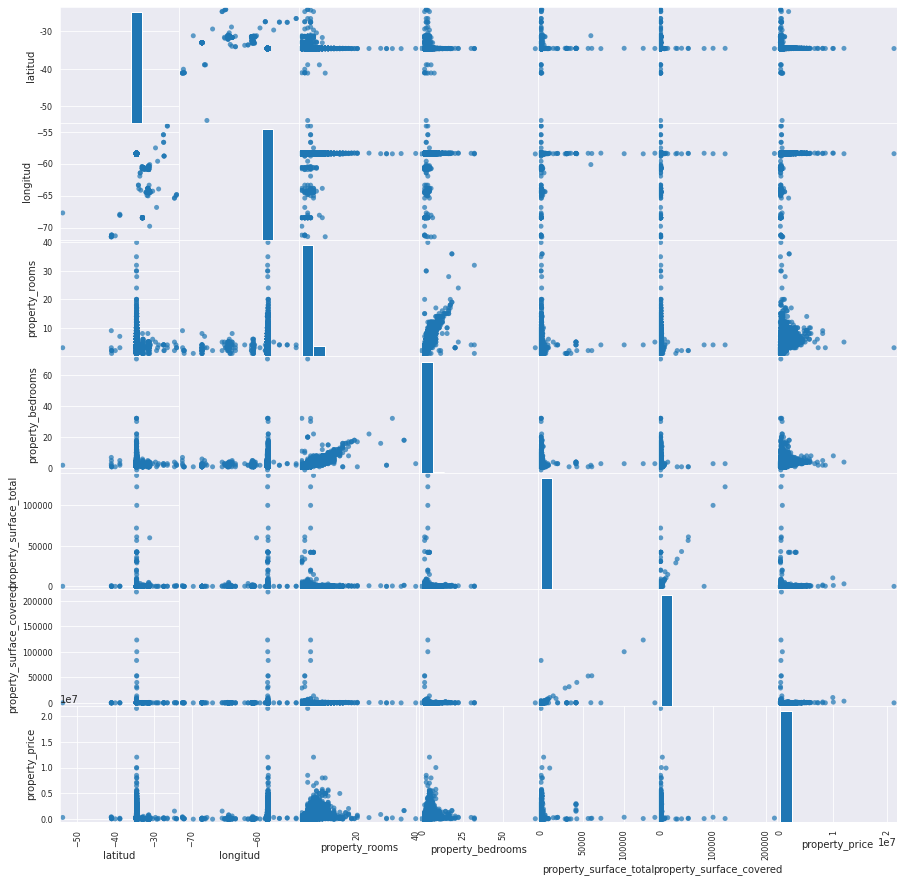

In [13]:
from pandas.plotting import scatter_matrix

columns = description_quantitatives.columns.tolist()
#columns += ["start_date","end_date","created_on"]
quantitative_dataset = properties_dataset[columns]
scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)


A primera vista pareceria que hay una correlacion entre property_surface_total y property_surface_covered, property_bedrooms y property_rooms

#### Analisis de correlacion

In [14]:
quantitative_dataset.corr()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
latitud,1.000000,-0.239235,0.005521,0.003162,0.025348,0.002352,0.016635
longitud,-0.239235,1.000000,-0.008324,-0.008556,-0.015056,-0.001155,0.023314
property_rooms,0.005521,-0.008324,1.000000,0.871940,0.067211,0.076097,0.488934
property_bedrooms,0.003162,-0.008556,0.871940,1.000000,0.067702,0.075075,0.425386
property_surface_total,0.025348,-0.015056,0.067211,0.067702,1.000000,0.604311,0.085235
property_surface_covered,0.002352,-0.001155,0.076097,0.075075,0.604311,1.000000,0.056238
property_price,0.016635,0.023314,0.488934,0.425386,0.085235,0.056238,1.000000


Como podemos observar lo que visualizamos anteriormente estaba bastante acertado ya que teniendo en cuenta la correlación de pearson entre las variables, se puede notar que property_rooms y property_bedrooms tienen un valor de 0.87, lo que indica que hay una fuerte correlacion entre estas. Por el lado de property_surface_covered y property_surface_total su valor es de 0.60 por lo que no hay tanta relación. Finalmente, podemos apreciar una menor relacion entre property_price y property_rooms(0.44), y entre property_price y property_bedrooms(0.39)

<AxesSubplot:>

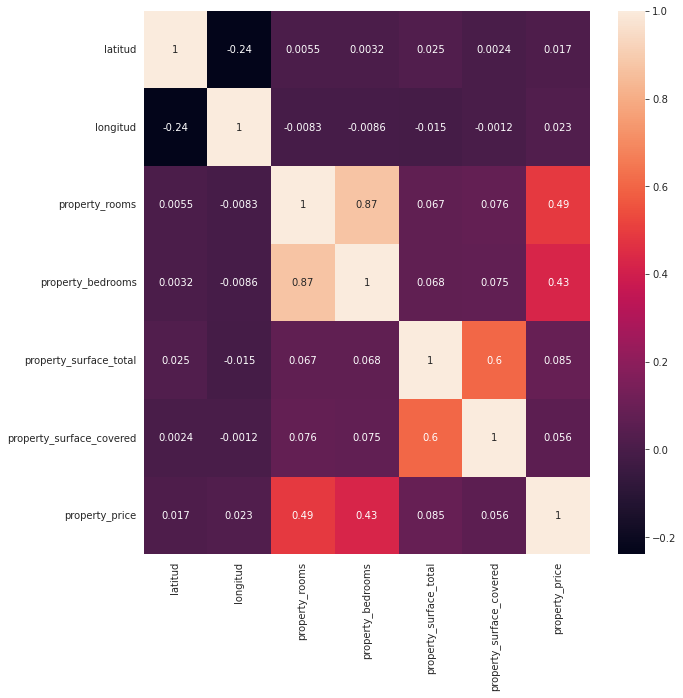

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(quantitative_dataset.corr(), annot=True)

#### Grafico de cantidad de propiedades por ciudad

<AxesSubplot:title={'center':'Grafico con el top 10 de ciudades con mas anuncios'}, xlabel='Ciudad', ylabel='Cantidad de Anuncios'>

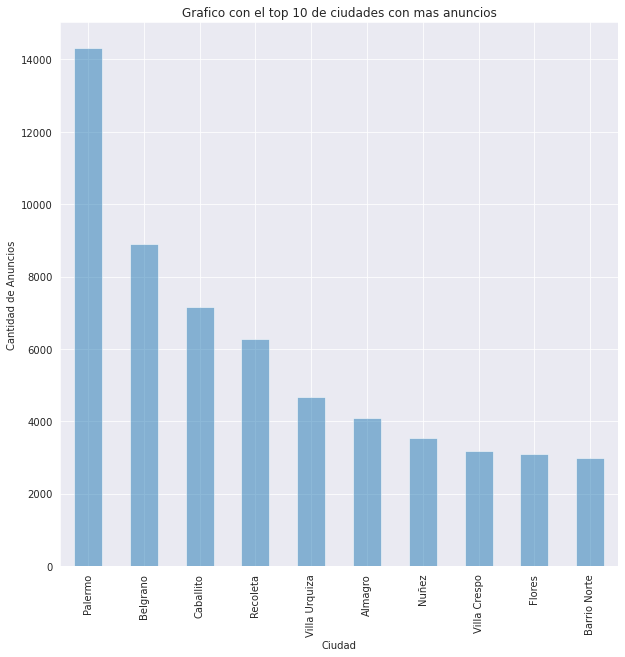

In [16]:

properties_dataset['place_l3'].value_counts().head(10).plot.bar(alpha=0.5,
                                                                title="Grafico con el top 10 de ciudades con mas anuncios",
                                                                xlabel="Ciudad", ylabel="Cantidad de Anuncios",
                                                                figsize=(10, 10))

### Histograma de cantidad de publicaciones por fecha

In [17]:
# hist = properties_dataset['created_on'].plot.hist(title='Histograma de cantidad de publicaciones por fecha', alpha=0.5,
#                                                   bins=35, figsize=(10, 10))
# hist.set_xlabel("Fecha")
# hist.set_ylabel("Publicaciones")


TypeError: The DType <class 'numpy._IntegerAbstractDType'> could not be promoted by <class 'numpy.dtype[datetime64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy._IntegerAbstractDType'>, <class 'numpy._IntegerAbstractDType'>, <class 'numpy.dtype[datetime64]'>)

Se puede observar que en entre el 2021-11 y 2022-01 hay un pico de publicaciones realizadas

### Dispersograma por latitud, longitud y tipo de propiedad

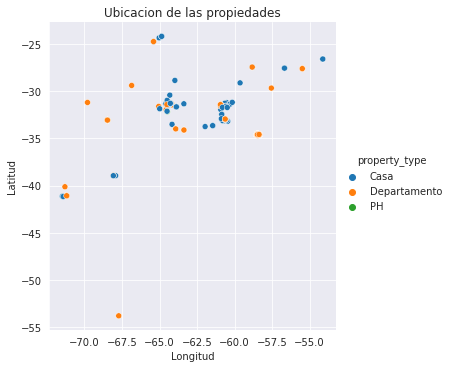

In [18]:
sns.relplot(data=properties_dataset, x="longitud", y="latitud", hue="property_type").set(
    title="Ubicacion de las propiedades", xlabel='Longitud', ylabel='Latitud')

# Propiedades en el mapa

In [19]:
import geopandas as gpd

In [20]:
caba = gpd.read_file('mapa/barrios.geojson')
caba.head()

,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366..."
1,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO,"MULTIPOLYGON (((-58.46558 -34.59656, -58.46562..."
2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO,"MULTIPOLYGON (((-58.42375 -34.59783, -58.42495..."
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO,"MULTIPOLYGON (((-58.49461 -34.61487, -58.49479..."
4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."


<AxesSubplot:>

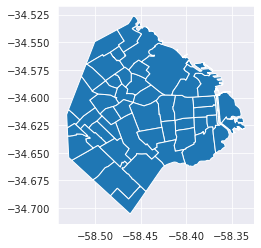

In [21]:
caba.plot()

In [22]:
geo_properties = gpd.GeoDataFrame(properties_dataset[['property_price']],
                                  geometry=gpd.points_from_xy(properties_dataset.longitud, properties_dataset.latitud))
geo_properties.head()

,property_price,geometry
25,210000.0,POINT EMPTY
42,82900.0,POINT (-58.36112 -34.63732)
43,99000.0,POINT (-58.36187 -34.62865)
49,146000.0,POINT (-58.40193 -34.61003)
51,250000.0,POINT (-58.41683 -34.63162)


In [23]:
dfsjoin = gpd.sjoin(caba, geo_properties)  #Spatial join
dfsjoin

,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry,index_right,property_price
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...",257619,60000.0
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...",313493,129000.0
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...",42654,104900.0
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...",270114,219000.0
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...",316943,140000.0
...,...,...,...,...,...,...,...,...
47,BOCA,4.0,20060.003939,5.036240e+06,BARRIO,"MULTIPOLYGON (((-58.35429 -34.62977, -58.35427...",390594,56000.0
47,BOCA,4.0,20060.003939,5.036240e+06,BARRIO,"MULTIPOLYGON (((-58.35429 -34.62977, -58.35427...",385549,60000.0
47,BOCA,4.0,20060.003939,5.036240e+06,BARRIO,"MULTIPOLYGON (((-58.35429 -34.62977, -58.35427...",174091,55000.0
47,BOCA,4.0,20060.003939,5.036240e+06,BARRIO,"MULTIPOLYGON (((-58.35429 -34.62977, -58.35427...",424055,105000.0


In [24]:
propiedades_por_barrio = gpd.GeoDataFrame(dfsjoin['geometry'].value_counts()\
    .reset_index()\
    .rename(columns={'index': 'geometry', 'geometry': 'properties'}))
propiedades_por_barrio.head()

,geometry,properties
0,"MULTIPOLYGON (((-58.42676 -34.55202, -58.42676...",13490
1,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002...",7613
2,"MULTIPOLYGON (((-58.45057 -34.53561, -58.45066...",6306
3,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...",6110
4,"MULTIPOLYGON (((-58.48098 -34.56264, -58.48023...",4299


In [25]:
dfsjoin[['geometry', 'property_price']].groupby('geometry')

TypeError: 'Text' object is not callable

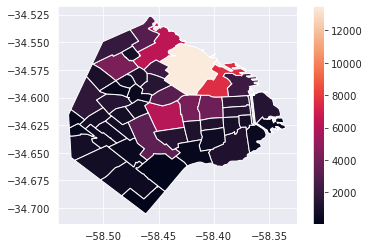

In [27]:
plot = propiedades_por_barrio.plot(column='properties', legend=True)

plot.title("Cantidad de publicaciones por comuna")